In [833]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [834]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [835]:
!pip install mplfinance

In [836]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import io

In [837]:
# Reading the data
Stocks = pd.read_csv('/content/drive/MyDrive/Stock.csv')

In [838]:
Stocks.head()

,Date,S&P500,AAL,ALGT,ALK,DAL,HA,LUV,BCS,CS,...,MRK,PFE,RHHBY,UNH,AAPL,AMZN,FB,GOOG,IBM,MSFT
0,01-10-2010,1146.239990,9.29,43.230000,12.4475,12.01,5.96,12.94,17.603687,42.226563,...,36.599998,17.180000,17.389999,35.430000,10.090000,153.710007,NaN,261.828613,135.639999,24.379999
1,04-10-2010,1137.030029,9.12,41.590000,12.1425,11.51,5.75,12.82,17.502304,41.914063,...,36.520000,16.900000,17.275000,34.540001,9.951428,155.389999,NaN,260.199707,135.250000,23.910000
2,05-10-2010,1160.750000,9.23,42.099998,12.2150,11.83,5.85,13.02,18.156683,43.154297,...,37.020000,17.230000,17.799999,35.070000,10.319285,160.869995,NaN,268.110046,137.660004,24.350000
3,06-10-2010,1159.969971,9.23,41.950001,12.1875,11.78,5.97,12.94,17.944700,43.437500,...,37.009998,17.260000,17.975000,33.950001,10.328215,155.399994,NaN,266.177307,137.839996,24.430000
4,07-10-2010,1158.060059,9.24,41.700001,11.6250,11.77,6.15,12.88,17.253456,43.671875,...,36.709999,17.379999,17.930000,34.340000,10.329286,156.270004,NaN,264.015411,138.720001,24.530001


In [839]:
# Check the number of rows and columns in the dataframe
Stocks.shape

(2517, 26)

In [840]:
# Check the column-wise info of the dataframe
Stocks.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2517 non-null   object 
 1   S&P500  2517 non-null   float64
 2   AAL     2517 non-null   float64
 3   ALGT    2517 non-null   float64
 4   ALK     2517 non-null   float64
 5   DAL     2517 non-null   float64
 6   HA      2517 non-null   float64
 7   LUV     2517 non-null   float64
 8   BCS     2517 non-null   float64
 9   CS      2517 non-null   float64
 10  DB      2517 non-null   float64
 11  GS      2517 non-null   float64
 12  MS      2517 non-null   float64
 13  WFC     2517 non-null   float64
 14  BHC     2517 non-null   float64
 15  JNJ     2517 non-null   float64
 16  MRK     2517 non-null   float64
 17  PFE     2517 non-null   float64
 18  RHHBY   2517 non-null   float64
 19  UNH     2517 non-null   float64
 20  AAPL    2517 non-null   float64
 21  AMZN    2517 non-null   float64
 22  

In [841]:
Stocks=Stocks.set_index('Date')

In [842]:
#Taking the Closing_Price of stocks after 2015
filtered_Stocks = Stocks.loc['30-09-2015':]

In [843]:
filtered_Stocks

,S&P500,AAL,ALGT,ALK,DAL,HA,LUV,BCS,CS,DB,...,MRK,PFE,RHHBY,UNH,AAPL,AMZN,FB,GOOG,IBM,MSFT
Date,,,,,,,,,,,,,,,,,,,,,
30-09-2015,1920.030029,38.830002,216.250000,79.449997,44.869999,24.680000,38.040001,14.78,24.030001,26.959999,...,49.389999,31.410000,32.950001,116.010002,27.575001,511.890015,89.900002,608.419983,144.970001,44.259998
01-10-2015,1923.819946,39.200001,217.979996,80.230003,45.410000,24.730000,38.410000,15.01,24.090000,26.520000,...,49.369999,31.840000,33.220001,116.610001,27.395000,520.719971,90.949997,611.289978,143.589996,44.610001
02-10-2015,1951.359985,38.630001,215.589996,79.260002,44.869999,24.280001,38.380001,15.39,24.639999,27.139999,...,50.139999,33.080002,33.320000,118.830002,27.594999,532.539978,92.070000,626.909973,144.580002,45.570000
05-10-2015,1987.050049,40.189999,216.059998,80.910004,46.959999,25.500000,39.299999,15.60,25.160000,28.200001,...,51.230000,33.480000,33.439999,119.650002,27.695000,543.679993,94.010002,641.469971,149.039993,46.630001
06-10-2015,1979.920044,38.130001,208.600006,74.529999,45.090000,24.250000,38.000000,15.55,25.379999,28.400000,...,49.799999,32.790001,33.529999,116.050003,27.827499,537.479980,92.800003,645.440002,148.779999,46.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24-09-2020,3246.590088,11.770000,121.500000,35.700001,29.010000,12.400000,36.860001,4.75,9.620000,8.110000,...,83.150002,35.759998,44.700001,292.660004,108.220001,3019.790039,249.529999,1428.290039,118.089996,203.190002
25-09-2020,3298.459961,12.290000,123.760002,36.700001,29.780001,12.800000,37.099998,4.70,9.480000,8.000000,...,82.930000,36.049999,44.820000,302.500000,112.279999,3095.129883,254.820007,1444.959961,118.949997,207.820007
28-09-2020,3351.600098,12.760000,127.110001,37.540001,31.340000,13.380000,38.240002,4.99,9.900000,8.430000,...,82.760002,36.389999,44.110001,303.230011,114.959999,3174.050049,256.820007,1464.520020,121.730003,209.440002


In [844]:
# Check the summary for the numeric columns
filtered_Stocks.describe()

,S&P500,AAL,ALGT,ALK,DAL,HA,LUV,BCS,CS,DB,...,MRK,PFE,RHHBY,UNH,AAPL,AMZN,FB,GOOG,IBM,MSFT
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,...,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,2607.883578,36.395881,144.779706,66.838492,48.218722,35.268968,49.511952,9.319762,14.138635,13.603992,...,68.014310,36.286937,33.510786,213.048103,47.064710,1426.264357,163.552635,1040.445304,143.655826,102.139111
std,395.057582,11.482625,24.977995,15.351976,9.375091,11.350214,8.835311,2.191715,3.250065,5.334060,...,11.558295,3.815764,4.662464,59.468862,20.991867,668.592112,40.083686,241.811747,15.157899,45.769342
min,1829.079956,9.040000,66.230003,23.559999,19.190001,8.630000,23.870001,3.840000,6.670000,5.480000,...,48.590000,28.490000,26.389999,109.230003,22.584999,482.070007,89.900002,608.419983,94.769997,44.259998
25%,2263.765014,30.360001,130.087505,61.637500,45.257499,27.792499,42.392501,8.110000,11.997500,8.697500,...,58.660000,33.459999,30.629999,160.562503,29.816249,817.832504,129.065006,797.044998,134.327503,62.634999
50%,2656.200074,37.955000,144.000000,66.160000,50.340000,36.895001,51.870001,9.330000,13.740000,13.490000,...,64.074997,35.764999,32.045000,226.409996,42.962502,1498.525024,167.209999,1055.805054,144.245002,93.890000
75%,2888.237488,45.082501,162.600006,75.784998,54.737499,42.842500,55.932500,10.780000,15.510000,17.452500,...,79.370001,38.330002,34.470001,259.740005,53.866877,1828.564972,186.892498,1196.160004,153.419998,135.190003
max,3580.840088,58.470001,227.860001,100.239998,63.160000,60.299999,66.290001,15.810000,25.959999,30.750000,...,92.040001,46.230000,46.840000,323.700012,134.179993,3531.449951,303.910004,1728.280029,181.949997,231.649994


In [845]:
filtered_Stocks.shape

(1260, 25)

In [846]:
#check for missing values
filtered_Stocks.isnull().sum()

,0
S&P500,0
AAL,0
ALGT,0
ALK,0
DAL,0
HA,0
LUV,0
BCS,0
CS,0
DB,0


In [847]:
#Relative Strength Analysis
Relative_Strength_Analysis = filtered_Stocks.copy()
for i in filtered_Stocks.columns:
    Relative_Strength_Analysis[i] = filtered_Stocks[i] / filtered_Stocks['S&P500']
Relative_Strength_Analysis.head()

,S&P500,AAL,ALGT,ALK,DAL,HA,LUV,BCS,CS,DB,...,MRK,PFE,RHHBY,UNH,AAPL,AMZN,FB,GOOG,IBM,MSFT
Date,,,,,,,,,,,,,,,,,,,,,
30-09-2015,1.0,0.020224,0.112628,0.041380,0.023369,0.012854,0.019812,0.007698,0.012515,0.014041,...,0.025724,0.016359,0.017161,0.060421,0.014362,0.266605,0.046822,0.316880,0.075504,0.023052
01-10-2015,1.0,0.020376,0.113306,0.041703,0.023604,0.012855,0.019965,0.007802,0.012522,0.013785,...,0.025662,0.016550,0.017268,0.060614,0.014240,0.270670,0.047276,0.317748,0.074638,0.023188
02-10-2015,1.0,0.019796,0.110482,0.040618,0.022994,0.012443,0.019668,0.007887,0.012627,0.013908,...,0.025695,0.016952,0.017075,0.060896,0.014141,0.272907,0.047182,0.321268,0.074092,0.023353
05-10-2015,1.0,0.020226,0.108734,0.040719,0.023633,0.012833,0.019778,0.007851,0.012662,0.014192,...,0.025782,0.016849,0.016829,0.060215,0.013938,0.273612,0.047311,0.322825,0.075006,0.023467
06-10-2015,1.0,0.019258,0.105358,0.037643,0.022774,0.012248,0.019193,0.007854,0.012819,0.014344,...,0.025153,0.016561,0.016935,0.058613,0.014055,0.271465,0.046871,0.325993,0.075144,0.023612


In [848]:
Stock_names=['S&P500', 'AAL', 'ALGT', 'ALK', 'DAL', 'HA', 'LUV', 'BCS','CS', 'DB', 'GS', 'MS', 'WFC', 'BHC', 'JNJ',
             'MRK', 'PFE', 'RHHBY', 'UNH','AAPL', 'AMZN', 'FB', 'GOOG', 'IBM', 'MSFT']

In [849]:
daily_returns= pd.DataFrame()
for i in Stock_names:
    daily_returns[i] = (filtered_Stocks[i]/filtered_Stocks[i].shift(1))-1

In [850]:
daily_returns.head()

,S&P500,AAL,ALGT,ALK,DAL,HA,LUV,BCS,CS,DB,...,MRK,PFE,RHHBY,UNH,AAPL,AMZN,FB,GOOG,IBM,MSFT
Date,,,,,,,,,,,,,,,,,,,,,
30-09-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-10-2015,0.001974,0.009529,0.008000,0.009818,0.012035,0.002026,0.009727,0.015562,0.002497,-0.016320,...,-0.000405,0.013690,0.008194,0.005172,-0.006528,0.017250,0.011680,0.004717,-0.009519,0.007908
02-10-2015,0.014315,-0.014541,-0.010964,-0.012090,-0.011892,-0.018196,-0.000781,0.025316,0.022831,0.023379,...,0.015597,0.038945,0.003010,0.019038,0.007301,0.022699,0.012314,0.025553,0.006895,0.021520
05-10-2015,0.018290,0.040383,0.002180,0.020818,0.046579,0.050247,0.023971,0.013645,0.021104,0.039057,...,0.021739,0.012092,0.003601,0.006901,0.003624,0.020919,0.021071,0.023225,0.030848,0.023261
06-10-2015,-0.003588,-0.051256,-0.034527,-0.078853,-0.039821,-0.049020,-0.033079,-0.003205,0.008744,0.007092,...,-0.027913,-0.020609,0.002691,-0.030088,0.004784,-0.011404,-0.012871,0.006189,-0.001744,0.002573


In [851]:
#obtaining important stastical data
daily_returns.describe()

,S&P500,AAL,ALGT,ALK,DAL,HA,LUV,BCS,CS,DB,...,MRK,PFE,RHHBY,UNH,AAPL,AMZN,FB,GOOG,IBM,MSFT
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,...,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,0.000519,-0.000328,-0.000041,-0.000248,0.000051,0.000036,0.000252,-0.000536,-0.000434,-0.000541,...,0.000511,0.000219,0.000299,0.000945,0.001316,0.001623,0.001058,0.000837,-0.000009,0.001392
std,0.012075,0.034712,0.029090,0.026898,0.026470,0.033119,0.022906,0.025113,0.022833,0.027735,...,0.014061,0.013826,0.013511,0.017804,0.018723,0.018966,0.020348,0.016514,0.016082,0.017533
min,-0.119841,-0.252246,-0.283300,-0.232385,-0.259924,-0.264971,-0.151094,-0.218519,-0.182598,-0.174888,...,-0.088990,-0.077346,-0.089609,-0.172769,-0.128647,-0.079221,-0.189609,-0.111008,-0.128507,-0.147390
25%,-0.002932,-0.013608,-0.011298,-0.010718,-0.009709,-0.014904,-0.009206,-0.010786,-0.010437,-0.015021,...,-0.006232,-0.005855,-0.006221,-0.006640,-0.006243,-0.006707,-0.007200,-0.005775,-0.006514,-0.005884
50%,0.000688,-0.000479,-0.000359,0.000256,0.000788,0.000342,0.000637,0.000000,0.000000,-0.001053,...,0.000243,0.000231,0.000243,0.000810,0.000951,0.001640,0.001195,0.000979,0.000476,0.001243
75%,0.005207,0.013229,0.011603,0.010619,0.009824,0.015071,0.009988,0.010270,0.010408,0.013871,...,0.007611,0.006404,0.006929,0.008147,0.009903,0.010779,0.010895,0.008781,0.006862,0.009161
max,0.093828,0.410970,0.292428,0.203079,0.210171,0.245837,0.144441,0.151042,0.163447,0.140244,...,0.104080,0.089607,0.130118,0.127989,0.119808,0.132164,0.155214,0.104485,0.113011,0.142169


In [852]:
Stats = daily_returns.describe().loc[['mean','std','min','max']]

In [853]:
Stats.rename(index = {'mean':'Average Daily Returns','std':'Risk/Volatility','min':'Minimum','max':'Maximum'},inplace= True)

In [854]:
Stats

,S&P500,AAL,ALGT,ALK,DAL,HA,LUV,BCS,CS,DB,...,MRK,PFE,RHHBY,UNH,AAPL,AMZN,FB,GOOG,IBM,MSFT
Average Daily Returns,0.000519,-0.000328,-0.000041,-0.000248,0.000051,0.000036,0.000252,-0.000536,-0.000434,-0.000541,...,0.000511,0.000219,0.000299,0.000945,0.001316,0.001623,0.001058,0.000837,-0.000009,0.001392
Risk/Volatility,0.012075,0.034712,0.029090,0.026898,0.026470,0.033119,0.022906,0.025113,0.022833,0.027735,...,0.014061,0.013826,0.013511,0.017804,0.018723,0.018966,0.020348,0.016514,0.016082,0.017533
Minimum,-0.119841,-0.252246,-0.283300,-0.232385,-0.259924,-0.264971,-0.151094,-0.218519,-0.182598,-0.174888,...,-0.088990,-0.077346,-0.089609,-0.172769,-0.128647,-0.079221,-0.189609,-0.111008,-0.128507,-0.147390
Maximum,0.093828,0.410970,0.292428,0.203079,0.210171,0.245837,0.144441,0.151042,0.163447,0.140244,...,0.104080,0.089607,0.130118,0.127989,0.119808,0.132164,0.155214,0.104485,0.113011,0.142169


In [855]:
Annual_Returns = pd.DataFrame(Stats.loc['Average Daily Returns']*252*100)
Annual_Returns.rename(columns = {'Average Daily Returns':'Annual Return %'},inplace=True)

In [856]:
Annual_Risk = pd.DataFrame((Stats.loc['Risk/Volatility']*(252**(1/2)))*100)

In [857]:
Cummulative_Returns = pd.DataFrame(100*(filtered_Stocks.iloc[-1] - filtered_Stocks.iloc[0])/filtered_Stocks.iloc[0])

In [858]:
Descriptive_Metrics = pd.concat([Annual_Returns,Annual_Risk,Cummulative_Returns],axis=1)

In [859]:
Descriptive_Metrics.rename(columns={'Risk/Volatility': 'Annual Risk %',0:'Cummulative Returns %'},inplace=True)

In [860]:
Descriptive_Metrics

,Annual Return %,Annual Risk %,Cummulative Returns %
S&P500,13.069808,19.168989,75.153511
AAL,-8.272605,55.103810,-68.349216
ALGT,-1.025274,46.179222,-44.601155
ALK,-6.242962,42.698800,-53.895529
DAL,1.293620,42.019352,-31.847558
HA,0.902731,52.574168,-47.771475
LUV,6.353628,36.361749,-1.419561
BCS,-13.496564,39.865406,-66.102842
CS,-10.946640,36.245755,-58.510197
DB,-13.643435,44.028613,-68.842729


In [861]:
Descriptive_Metrics['Sharpee Ratio'] = (Descriptive_Metrics['Annual Return %'] - 0.75)/Descriptive_Metrics['Annual Risk %']

In [862]:
Descriptive_Metrics

,Annual Return %,Annual Risk %,Cummulative Returns %,Sharpee Ratio
S&P500,13.069808,19.168989,75.153511,0.642695
AAL,-8.272605,55.103810,-68.349216,-0.163738
ALGT,-1.025274,46.179222,-44.601155,-0.038443
ALK,-6.242962,42.698800,-53.895529,-0.163774
DAL,1.293620,42.019352,-31.847558,0.012937
HA,0.902731,52.574168,-47.771475,0.002905
LUV,6.353628,36.361749,-1.419561,0.154108
BCS,-13.496564,39.865406,-66.102842,-0.357367
CS,-10.946640,36.245755,-58.510197,-0.322704
DB,-13.643435,44.028613,-68.842729,-0.326911


In [863]:
# Prepare the dataset
def prepare_dataset(data_string):
    df = pd.read_csv(io.StringIO(data_string))
    # Explicitly convert Date to datetime
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
    if df['Date'].isnull().any():
        print("Warning: Some dates could not be converted to datetime.")
    df = df.sort_values('Date')
    df = df.fillna(method='ffill')
    print("Dataset Prepared - First few rows:")
    print(df.head())
    print("Date column type:", df['Date'].dtype)
    return df

In [864]:
# 2. Create Lag Features & Moving Averages
def create_features(df, target_col='S&P500', lag_days=[1], ma_windows=[2]):
    original_len = len(df)
    if original_len < 2:
        print(f"\nWarning: Dataset too small ({original_len} rows) for any feature creation.")
        return df

    for lag in lag_days:
        if lag < original_len:
            df[f'{target_col}_lag_{lag}'] = df[target_col].shift(lag).fillna(df[target_col].mean())

    for window in ma_windows:
        if window <= original_len:
            df[f'{target_col}_ma_{window}'] = df[target_col].rolling(window=window, min_periods=1).mean()

    df = df.dropna()
    if len(df) == 0:
        print("\nWarning: No rows left after feature creation. Using original data.")
        return pd.read_csv(io.StringIO(data_string))

    print("\nFeatures Created - First few rows with lag and MA:")
    print(df.head())
    print(f"Rows after feature creation: {len(df)}")
    return df

In [865]:
# 3. Train/Test Split
def split_data(df, target_col='S&P500', test_size=0.2):
    feature_cols = [col for col in df.columns if col != 'Date' and col != target_col]
    X = df[feature_cols].values
    y = df[target_col].values

    if len(X) < 2:
        print(f"\nWarning: Only {len(X)} sample(s) available. Using single sample for both train and test.")
        X_train, X_test = X, X
        y_train, y_test = y, y
        scaler_X = MinMaxScaler()
        scaler_y = MinMaxScaler()
        try:
            X_scaled = scaler_X.fit_transform(X.reshape(1, -1) if len(X) == 1 else X)
            y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))
        except ValueError as e:
            print(f"Scaling error: {e}. Using unscaled data.")
            X_scaled, y_scaled = X, y.reshape(-1, 1)
        X_train, X_test = X_scaled, X_scaled
        y_train, y_test = y_scaled, y_scaled
    else:
        scaler_X = MinMaxScaler()
        scaler_y = MinMaxScaler()
        try:
            X_scaled = scaler_X.fit_transform(X)
            y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))
            X_train, X_test, y_train, y_test = train_test_split(
                X_scaled, y_scaled, test_size=test_size, shuffle=False
            )
        except ValueError as e:
            print(f"Scaling error: {e}. Using unscaled data.")
            X_train, X_test = train_test_split(X, test_size=test_size, shuffle=False)
            y_train, y_test = train_test_split(y.reshape(-1, 1), test_size=test_size, shuffle=False)
            scaler_X, scaler_y = None, None

    print(f"\nData Split:")
    print(f"Training set shape: {X_train.shape}")
    print(f"Test set shape: {X_test.shape}")
    return X_train, X_test, y_train, y_test, scaler_X, scaler_y

In [866]:
# 4. Define PyTorch Dataset
class StockDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [867]:
# 5. Build Neural Network
class StockPredictor(nn.Module):
    def __init__(self, input_size):
        super(StockPredictor, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 16),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(8, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [868]:
# 6. Training Function
def train_model(model, train_loader, test_loader, num_epochs=5):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            if torch.isnan(outputs).any() or torch.isinf(outputs).any():
                print("Warning: NaN or Inf in model outputs during training")
                continue
            loss = criterion(outputs, y_batch)
            if torch.isnan(loss) or torch.isinf(loss):
                print("Warning: NaN or Inf in loss during training")
                continue
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss = train_loss / len(train_loader) if len(train_loader) > 0 else 0
        train_losses.append(train_loss)

        model.eval()
        test_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                if torch.isnan(outputs).any() or torch.isinf(outputs).any():
                    print("Warning: NaN or Inf in model outputs during testing")
                    continue
                loss = criterion(outputs, y_batch)
                test_loss += loss.item()

        test_loss = test_loss / len(test_loader) if len(test_loader) > 0 else 0
        test_losses.append(test_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

    return train_losses, test_losses

In [869]:
data_string = """Date,S&P500,AAL,ALGT,ALK,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,FB,GOOG,IBM,MSFT
01-10-2010,1146.23999,9.29,43.23,12.4475,12.01,5.96,12.94,17.603687,42.226563,52.595421,147.699997,25.02,25.559999,25.75,61.75,36.599998,17.18,17.389999,35.43,10.09,153.710007,,261.828613,135.639999,24.379999
04-10-2010,1137.030029,9.12,41.59,12.1425,11.51,5.75,12.82,17.502304,41.914063,51.755726,146.570007,24.709999,25.379999,25.870001,61.669998,36.52,16.9,17.275,34.540001,9.951428,155.389999,,260.199707,135.25,23.91
05-10-2010,1160.75,9.23,42.099998,12.215,11.83,5.85,13.02,18.156683,43.154297,53.950382,149.570007,25.469999,26.25,26.299999,62.799999,37.02,17.23,17.799999,35.07,10.319285,160.869995,,268.110046,137.660004,24.35
"""

print("Starting Stock Price Prediction Analysis\n")

Starting Stock Price Prediction Analysis



In [870]:
# Main execution - Single run
print("Starting Stock Price Prediction Analysis\n")

# Prepare data
df = prepare_dataset(data_string)

# Create features
df = create_features(df)

# Split data
X_train, X_test, y_train, y_test, scaler_X, scaler_y = split_data(df)

# Create datasets and dataloaders
train_dataset = StockDataset(X_train, y_train)
test_dataset = StockDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=min(32, len(train_dataset)), shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=min(32, len(test_dataset)), shuffle=False)

# Initialize and train model
input_size = X_train.shape[1]
model = StockPredictor(input_size)
print(f"\nModel Architecture - Input Size: {input_size}")
print(model)

print("\nTraining Model:")
train_losses, test_losses = train_model(model, train_loader, test_loader)


Starting Stock Price Prediction Analysis

Dataset Prepared - First few rows:
        Date       S&P500   AAL       ALGT      ALK    DAL    HA    LUV  \
0 2010-10-01  1146.239990  9.29  43.230000  12.4475  12.01  5.96  12.94   
1 2010-10-04  1137.030029  9.12  41.590000  12.1425  11.51  5.75  12.82   
2 2010-10-05  1160.750000  9.23  42.099998  12.2150  11.83  5.85  13.02   

         BCS         CS  ...        MRK    PFE      RHHBY        UNH  \
0  17.603687  42.226563  ...  36.599998  17.18  17.389999  35.430000   
1  17.502304  41.914063  ...  36.520000  16.90  17.275000  34.540001   
2  18.156683  43.154297  ...  37.020000  17.23  17.799999  35.070000   

        AAPL        AMZN  FB        GOOG         IBM       MSFT  
0  10.090000  153.710007 NaN  261.828613  135.639999  24.379999  
1   9.951428  155.389999 NaN  260.199707  135.250000  23.910000  
2  10.319285  160.869995 NaN  268.110046  137.660004  24.350000  

[3 rows x 26 columns]
Date column type: datetime64[ns]


Data Split:

<ipython-input-863-072f8c0e5f9f>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [871]:
# Evaluate Performance
model.eval()
with torch.no_grad():
    y_pred = model(torch.FloatTensor(X_test))
    # Check for NaN or Inf in predictions
    if torch.isnan(y_pred).any() or torch.isinf(y_pred).any():
        print("Error: NaN or Inf in predictions. Falling back to zero predictions.")
        y_pred = torch.zeros_like(y_pred)

    # Inverse transform, with fallback for scaling issues
    try:
        y_pred = scaler_y.inverse_transform(y_pred.numpy()) if scaler_y else y_pred.numpy()
        y_test_inv = scaler_y.inverse_transform(y_test) if scaler_y else y_test
    except Exception as e:
        print(f"Scaling error: {e}. Using raw predictions.")
        y_pred = y_pred.numpy()
        y_test_inv = y_test

    # Replace any remaining NaN with mean or zero
    y_pred = np.nan_to_num(y_pred, nan=np.nanmean(y_pred) if np.any(y_pred) else 0)
    y_test_inv = np.nan_to_num(y_test_inv, nan=np.nanmean(y_test_inv) if np.any(y_test_inv) else 0)

    mse = np.mean((y_pred - y_test_inv)**2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_pred - y_test_inv))

    print(f'\nPerformance Metrics:')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')


Error: NaN or Inf in predictions. Falling back to zero predictions.

Performance Metrics:
MSE: 562.64
RMSE: 23.72
MAE: 23.72


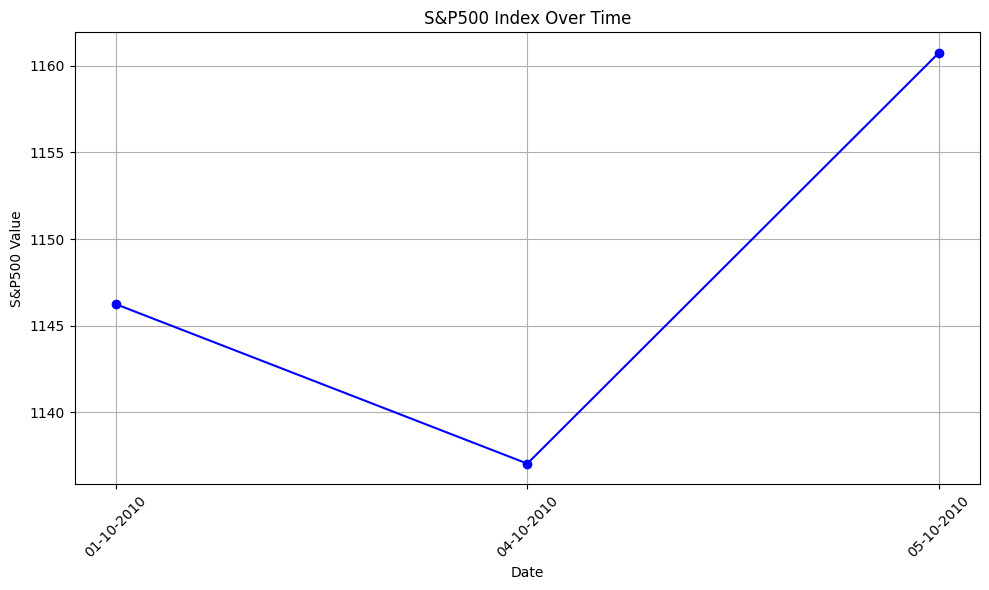

In [872]:
# 1. Line Chart: S&P500 Over Time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['S&P500'], marker='o', linestyle='-', color='b')
plt.title('S&P500 Index Over Time')
plt.xlabel('Date')
plt.ylabel('S&P500 Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

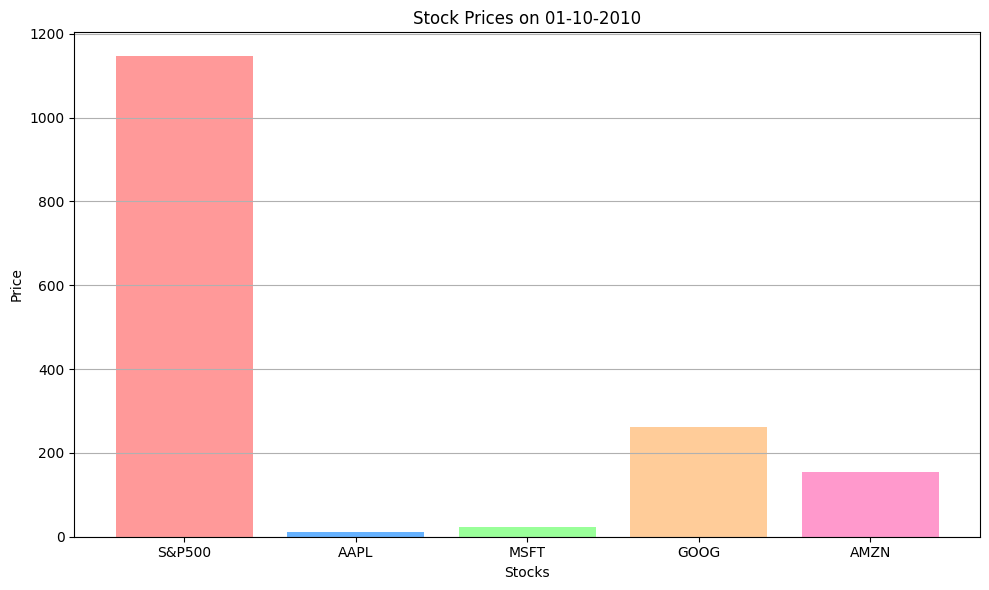

In [873]:
# 2. Bar Chart: Stock Prices for First Date (01-10-2010)
stocks_to_compare = ['S&P500', 'AAPL', 'MSFT', 'GOOG', 'AMZN']
first_date_data = df[df['Date'] == df['Date'].iloc[0]][stocks_to_compare]

plt.figure(figsize=(10, 6))
plt.bar(first_date_data.columns, first_date_data.iloc[0], color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC'])
date_value = df["Date"].iloc[0]
if isinstance(date_value, str):
    formatted_date = date_value
else:
    formatted_date = date_value.strftime("%d-%m-%Y")
plt.title(f'Stock Prices on {formatted_date}')
plt.xlabel('Stocks')
plt.ylabel('Price')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

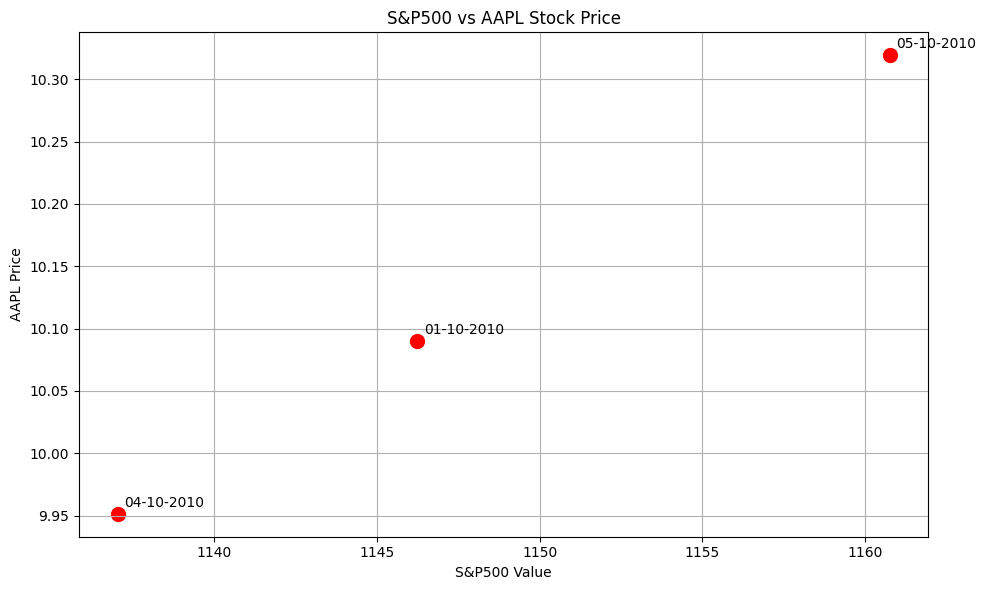

In [874]:
# 3. Scatter Plot: S&P500 vs AAPL
plt.figure(figsize=(10, 6))
plt.scatter(df['S&P500'], df['AAPL'], color='r', s=100)
for i, date in enumerate(df['Date']):
    # Handle string or datetime
    if isinstance(date, str):
        formatted_date = date
    else:
        formatted_date = date.strftime('%d-%m-%Y')
    plt.annotate(formatted_date, (df['S&P500'].iloc[i], df['AAPL'].iloc[i]),
                 xytext=(5, 5), textcoords='offset points')
plt.title('S&P500 vs AAPL Stock Price')
plt.xlabel('S&P500 Value')
plt.ylabel('AAPL Price')
plt.grid(True)
plt.tight_layout()
plt.show()

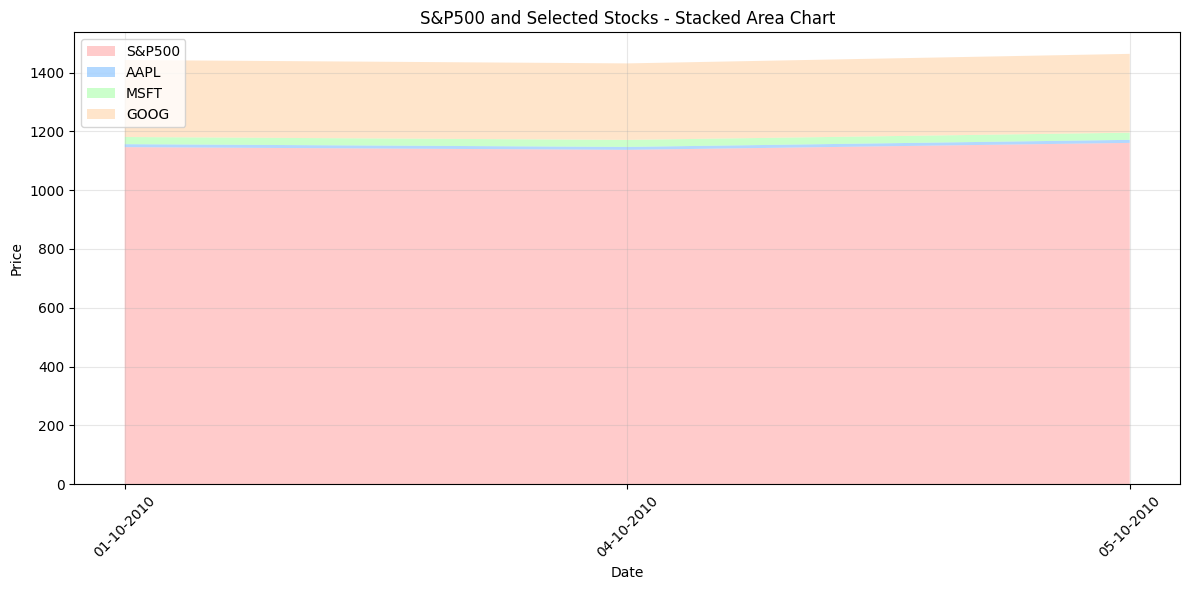

In [875]:
# 4. Area Chart: S&P500 with Stacked Areas for Selected Stocks
plt.figure(figsize=(12, 6))
selected_stocks = ['S&P500', 'AAPL', 'MSFT', 'GOOG']
plt.stackplot(df['Date'], *[df[stock] for stock in selected_stocks],
              labels=selected_stocks, alpha=0.5, colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
plt.title('S&P500 and Selected Stocks - Stacked Area Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-876-9eea34d1d231>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(stock_prices.values, labels=stock_prices.columns, patch_artist=True,


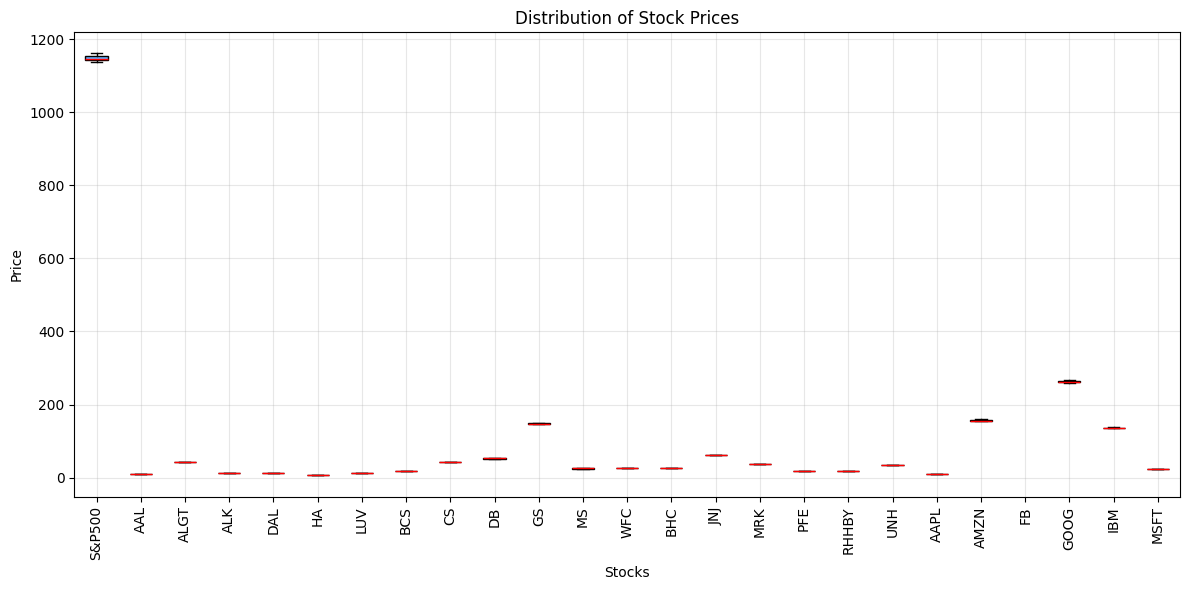

In [876]:
# 5. Box Plot: Distribution of Prices Across All Stocks
plt.figure(figsize=(12, 6))
stock_prices = df.drop(columns=['Date'])
plt.boxplot(stock_prices.values, labels=stock_prices.columns, patch_artist=True,
            boxprops=dict(facecolor='#66B2FF', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red'))
plt.title('Distribution of Stock Prices')
plt.xlabel('Stocks')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

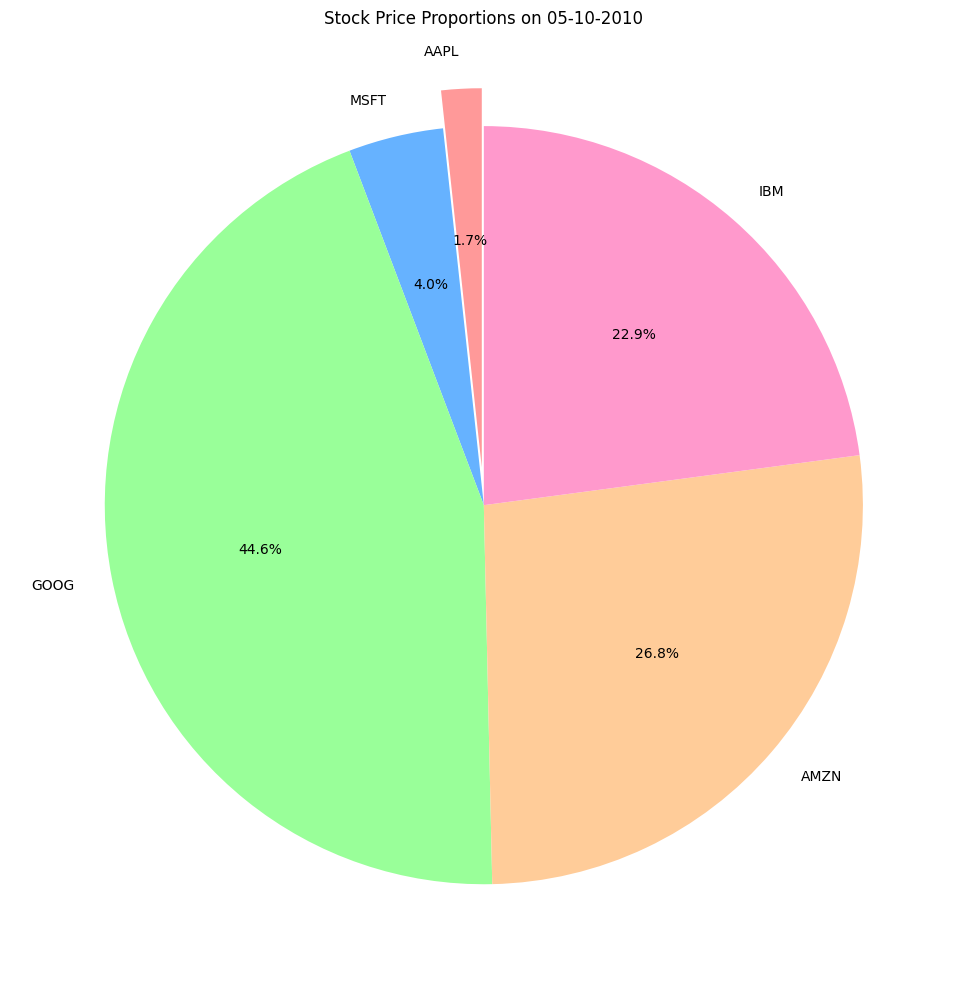

In [877]:
# 6. Pie Chart: Stock Price Proportions on Last Date
plt.figure(figsize=(10, 10))
last_date_data = df[df['Date'] == df['Date'].iloc[-1]][['AAPL', 'MSFT', 'GOOG', 'AMZN', 'IBM']]
plt.pie(last_date_data.iloc[0], labels=last_date_data.columns, autopct='%1.1f%%',
        colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC'],
        startangle=90, explode=(0.1, 0, 0, 0, 0))
# Handle string or datetime
date_value = df["Date"].iloc[-1]
if isinstance(date_value, str):
    formatted_date = date_value
else:
    formatted_date = date_value.strftime("%d-%m-%Y")
plt.title(f'Stock Price Proportions on {formatted_date}')
plt.tight_layout()
plt.show()

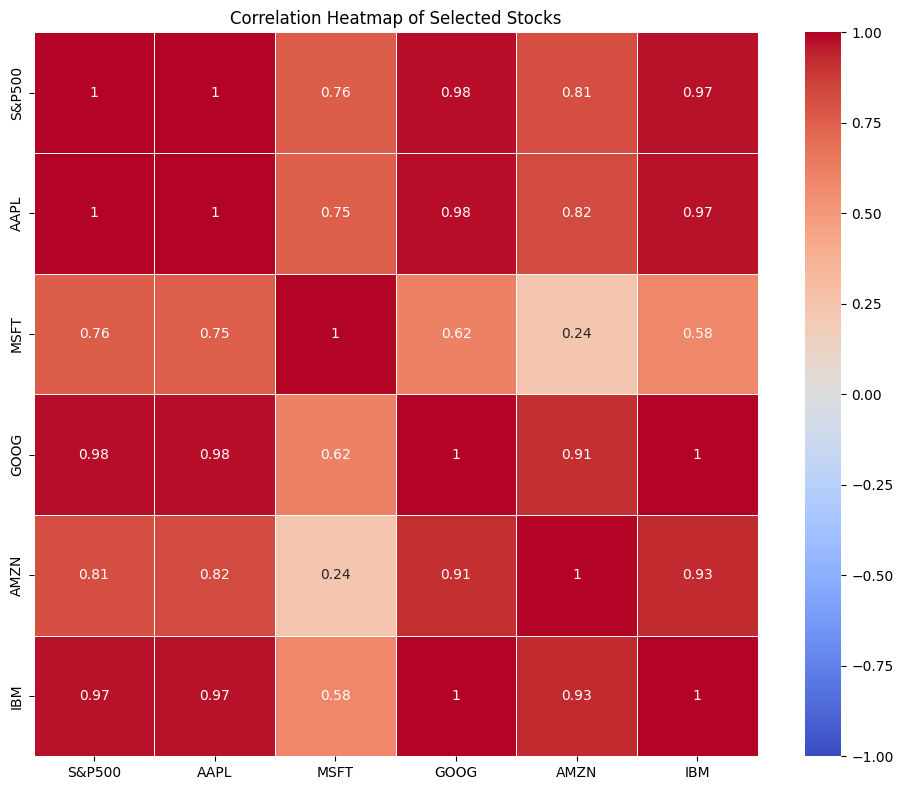

In [878]:
#7. Heatmap: Correlation Between Selected Stocks
plt.figure(figsize=(10, 8))
correlation_stocks = ['S&P500', 'AAPL', 'MSFT', 'GOOG', 'AMZN', 'IBM']
corr_matrix = df[correlation_stocks].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Selected Stocks')
plt.tight_layout()
plt.show()

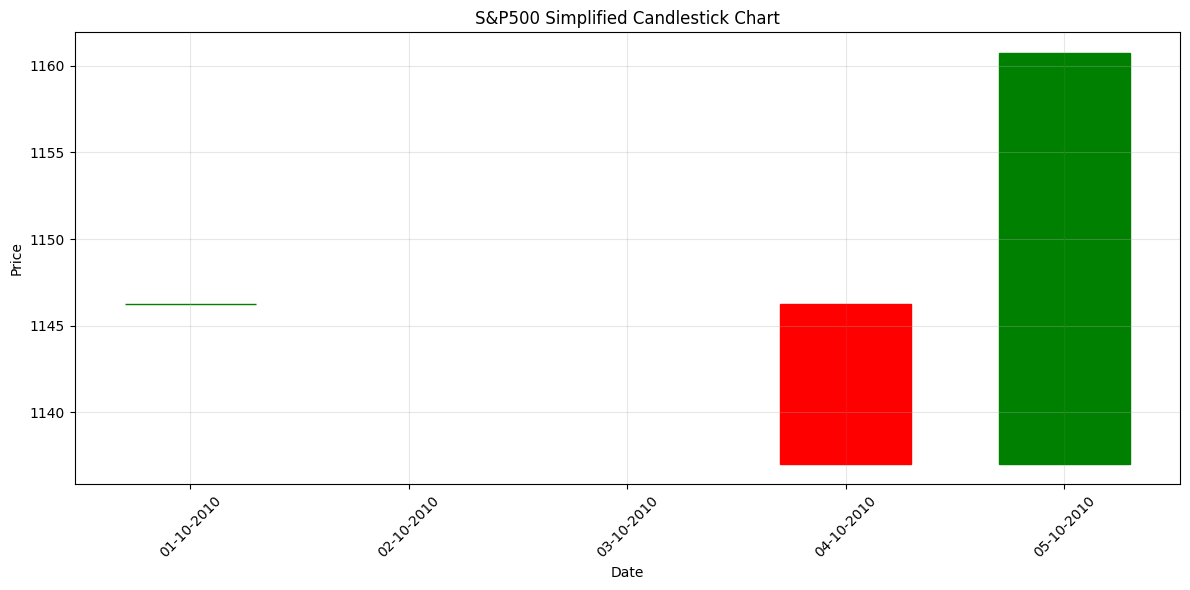

In [879]:
# 8. Candlestick Chart
plt.figure(figsize=(12, 6))
# Ensure Date is datetime before conversion
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df['DateNum'] = mdates.date2num(df['Date'])
ohlc = df[['DateNum', 'S&P500']].copy()
ohlc['Open'] = ohlc['S&P500'].shift(1).fillna(ohlc['S&P500'].iloc[0])
ohlc['High'] = ohlc[['S&P500', 'Open']].max(axis=1)
ohlc['Low'] = ohlc[['S&P500', 'Open']].min(axis=1)
ohlc['Close'] = ohlc['S&P500']
candlestick_ohlc(plt.gca(), ohlc[['DateNum', 'Open', 'High', 'Low', 'Close']].values,
                 width=0.6, colorup='g', colordown='r')
plt.title('S&P500 Simplified Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

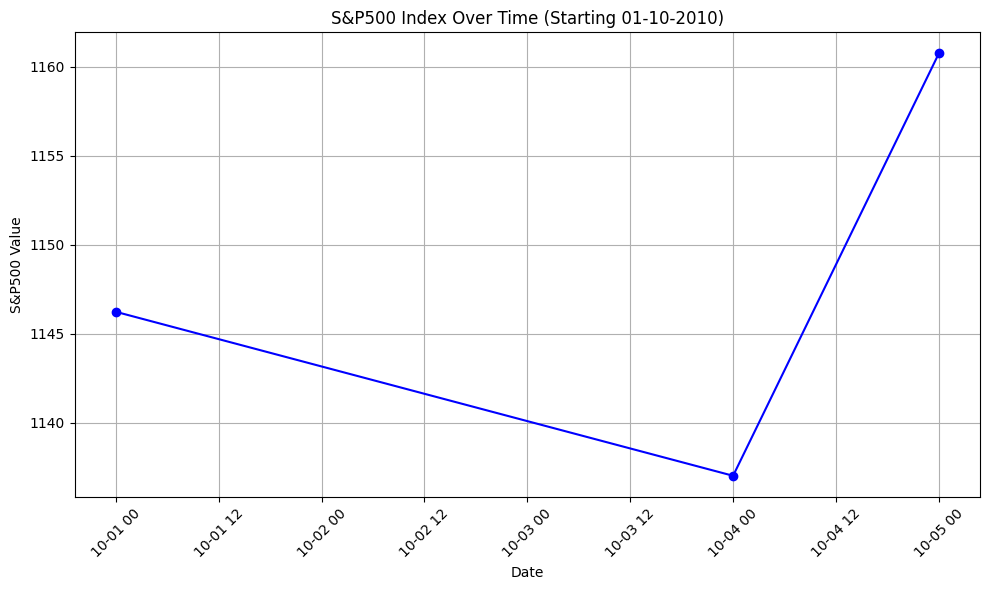

In [880]:
#9. Line Chart: S&P500 Over Time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['S&P500'], marker='o', linestyle='-', color='b')
# Handle string or datetime
date_value = df["Date"].iloc[0]
if isinstance(date_value, str):
    formatted_date = date_value
else:
    formatted_date = date_value.strftime("%d-%m-%Y")
plt.title(f'S&P500 Index Over Time (Starting {formatted_date})')
plt.xlabel('Date')
plt.ylabel('S&P500 Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()